In [1]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from scipy.misc import toimage

/home/eurismar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/eurismar/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 375s 2us/step


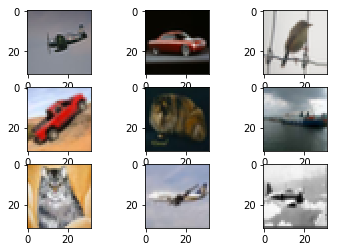

In [14]:
### import numpy as np
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    a = np.random.randint(1000)
    pyplot.imshow(toimage(X_train[a]))
# show the plot
pyplot.show()

In [40]:
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.models import Sequential
from keras import backend as K
K.set_image_dim_ordering('th')

In [41]:
import numpy

In [42]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [49]:
# Large CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype( 'float32' )
X_test = X_test.astype( 'float32' )
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
# Create the model
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 32, 32), activation='relu',
border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(Dropout(0.2))
model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=epochs,
batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(3, 32, 32..., activation="relu", padding="same")`
/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/home/eurismar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/h

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 16, 16)        36928     
__________

KeyboardInterrupt: 

In [25]:
X_train.shape

(50000, 32, 32, 3)

In [50]:
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_21 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 16, 16)        36928     
__________

In [52]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7000 - acc: 0.3792 - val_loss: 1.7925 - val_acc: 0.3832
Epoch 2/25
50000/50000 [==============================] - 58s 1ms/step - loss: 1.4312 - acc: 0.4803 - val_loss: 1.3541 - val_acc: 0.5086
Epoch 3/25
50000/50000 [==============================] - 59s 1ms/step - loss: 1.2843 - acc: 0.5370 - val_loss: 1.1875 - val_acc: 0.5684
Epoch 4/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.1670 - acc: 0.5807 - val_loss: 1.1753 - val_acc: 0.5839
Epoch 5/25
50000/50000 [==============================] - 61s 1ms/step - loss: 1.0667 - acc: 0.6183 - val_loss: 1.0533 - val_acc: 0.6245
Epoch 6/25
50000/50000 [==============================] - 61s 1ms/step - loss: 0.9875 - acc: 0.6472 - val_loss: 0.9769 - val_acc: 0.6518
Epoch 7/25
50000/50000 [==============================] - 61s 1ms/step - loss: 0.9120 - acc: 0.6733 - val_loss: 0.8985 - val_acc